## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('data/data.json')

In [2]:
import warnings
warnings.filterwarnings('ignore')

Have a look at the column names.

In [3]:
print(df.columns)
print(f"The number of features are {len(df.columns)}.")

Index(['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state'],
      dtype='object')
The number of features are 44.


**Target**

We don't have a target yet. We should build one.

What should be our target? Well we try to predict fraud events so our company will not lose money(or will lose less money). Account type may provide us relevant information eh? Lets have a look.



In [4]:
print(df.acct_type.value_counts())
print(type(df.acct_type[0]))

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64
<class 'str'>


Seee?! We have a lot of spammers and fraudsters around. 

We can create the target now. If fraud can be found in the acct_type that event is a fraud.

In addition, all of those spam events, I wonder if they would effect our analisis in a negative manner. I think I may create a sub category which is a dataset, without them.

In [5]:
df_no_spam = df.copy()
df_no_spam['spamer'] = ['spam' in val for val in df.acct_type]
df_no_spam['spamer'] = [1 if val==True else 0 for val in df_no_spam.spamer]

# Get names of indexes for which spammer is 1
indexNames = df_no_spam[df_no_spam['spamer'] == 1 ].index
 
# Delete these row indexes from dataFrame
df_no_spam.drop(indexNames , inplace=True)
df_no_spam = df_no_spam.drop(['spamer'],axis = 1)

In [6]:
print(df.shape)
print(df_no_spam.shape)

(14337, 44)
(13888, 44)


In [7]:
df_no_spam.acct_type.value_counts()

premium            12373
fraudster_event      851
fraudster            437
tos_warn              91
tos_lock              77
locked                54
fraudster_att          5
Name: acct_type, dtype: int64

In [8]:
df['target'] = ['fraud' in val for val in df.acct_type]
df['target'] = [1 if val==True else 0 for val in df.target]

df_no_spam['target'] = ['fraud' in val for val in df_no_spam.acct_type]
df_no_spam['target'] = [1 if val==True else 0 for val in df_no_spam.target]

In [9]:
df.to_csv('data/df__with_target')

In [40]:
df_no_spam.to_csv('data/df_no_spam') #you may find analisis on this on another notebook.

In [41]:
df.target.head() 

0    1
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Let me see if the dataset is balanced enough.

0.09018623142916929


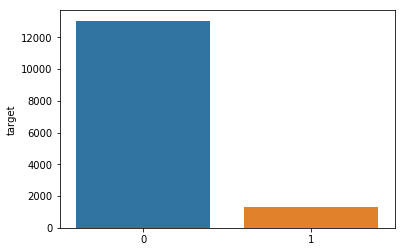

In [44]:
counts = df['target'].value_counts()
sns.barplot(counts.index, counts);
print(df.target.sum() / len(df.target)) # this
# print(sum(df.target) / df.shape[0])  or that

9% to 91%, its not perfect. We will see if this creates an overfit issue once we create a model.

Additionally, it may be benefitial to seperate the data from given conditions in order to find total cost to company. Thus when we build a model we can see how much money we are saving for the company.

**approx_payout_date**

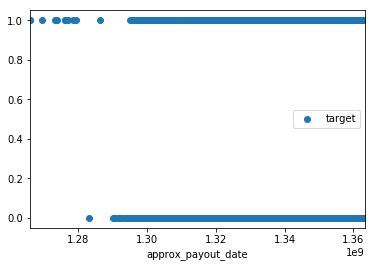

In [66]:
df.plot(x='approx_payout_date', y='target', style='o')

**body_length**

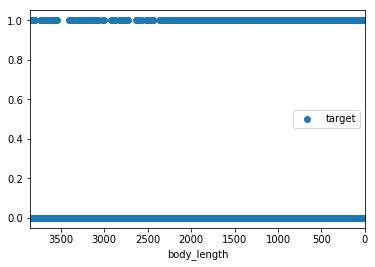

In [67]:
df.plot(x='body_length', y='target', style='o')

In [68]:
print(df.channels.unique())
print(df.channels.value_counts()) #dummy these

[ 5  0  8  6 11 12  4 10 13  9  7]
8     3364
0     2941
5     2459
11    2312
6     1736
4      556
12     470
10     237
13     232
9       20
7       10
Name: channels, dtype: int64



Looks like the company used numbers to define each channel type.

Assumption: 8 is facebook...

**country**

In [69]:
df.country.unique() #alright.. dummy these

array(['US', 'IE', 'FR', 'CA', 'GB', '', 'AU', 'ES', 'NL', 'DE', 'VN',
       'MY', 'NZ', 'PK', 'MA', 'AR', 'MX', 'CH', None, 'SG', 'TH', 'BE',
       'PH', 'A1', 'CI', 'AT', 'ID', 'PS', 'PT', 'TR', 'NI', 'KE', 'IT',
       'HU', 'RS', 'RO', 'NG', 'CZ', 'PR', 'AE', 'BS', 'KH', 'JM', 'IN',
       'NA', 'FI', 'HR', 'BG', 'VI', 'TJ', 'GH', 'PE', 'QA', 'SI', 'GR',
       'BB', 'CM', 'IS', 'SE', 'RU', 'DZ', 'VE', 'UY', 'ZA', 'IM', 'LB',
       'CR', 'IL', 'CN', 'DK', 'CO', 'EC', 'JE'], dtype=object)

**currency**

In [70]:
print(df.currency.unique())
print(df.currency.value_counts())

#drop MXN and dummy the rest.

['USD' 'EUR' 'CAD' 'GBP' 'AUD' 'NZD' 'MXN']
USD    9696
GBP    2222
CAD    1322
AUD     779
EUR     262
NZD      55
MXN       1
Name: currency, dtype: int64


**delivery_method**

In [71]:
print(df.delivery_method.unique())
print(df.delivery_method.value_counts())
print(df.delivery_method.isnull().sum()/df.shape[0])
#set nan values to 0 or get rid of them anyway their numbers are low

[ 0.  1.  3. nan]
0.0    8520
1.0    5554
3.0     247
Name: delivery_method, dtype: int64
0.0011159935830368976


**description**

In [72]:
df.description[0][0:1000]  ## killed it. This is our thing. We will run NLP on thi.

'<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p><br /><span style="font-family: Times New Roman,serif;"><font size="3"><font face="tahoma,arial,helvetica,sans-serif">No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music

In [73]:
# df.description[0:5]
# Text for NLP: description, email domain (parsing? TLD? domain name?

print(df.description.isnull().sum()/df.shape[0]) 
#let me see if the event is fraud or not when description is null(the ratio)

0.0


**user_age**

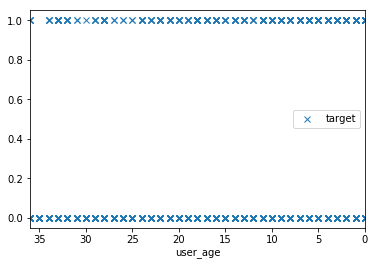

In [74]:
df.plot(x='user_age', y='target', style='x')

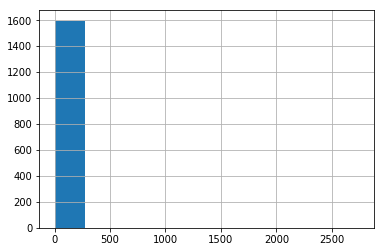

In [75]:
df.user_age.value_counts().hist() #awkward...

In [76]:
df.user_age.max() #now I see, these are number of hours since account is created or something similar.

3794

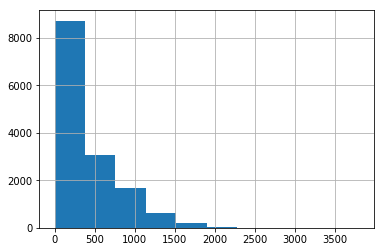

In [77]:
df.user_age.hist()


Looks like user age is documented in terms of number of days or hours since register.

**venue_address**

In [78]:
df.venue_address.head()

0           717 Washington Avenue
1                                
2    10100 Pioneer Blvd Suite 100
3                                
4          One Marina Park Drive 
Name: venue_address, dtype: object

**email_domain**

In [79]:
df.email_domain.head()

0                     gmail.com
1                       ruf.org
2                pvsd.k12.ca.us
3          irishtabletennis.com
4    artsandbusinesscouncil.org
Name: email_domain, dtype: object

lets see if any particular email_domain is popular among fraudster minds.

**ticket_type**

In [80]:
df.ticket_types.head()

0    [{'event_id': 527017, 'cost': 25.0, 'availabil...
1    [{'event_id': 786878, 'cost': 35.0, 'availabil...
2    [{'event_id': 787337, 'cost': 93.51, 'availabi...
3    [{'event_id': 885645, 'cost': 25.0, 'availabil...
4    [{'event_id': 1114349, 'cost': 150.0, 'availab...
Name: ticket_types, dtype: object

In [81]:
df.ticket_types[0]

[{'availability': 1,
  'cost': 25.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 800},
 {'availability': 1,
  'cost': 50.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 100},
 {'availability': 1,
  'cost': 550.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 20}]

In [82]:
type(df.ticket_types[0]) #looks like a dict but its a string.
#I will convert this to a complete dict so we grabbing information
#will be easier.

list

Tickey type columns have extremely important information regarding our analysis.

Essential for cost and revenue analysis!

We will have new notebook about this.




**has_logo**

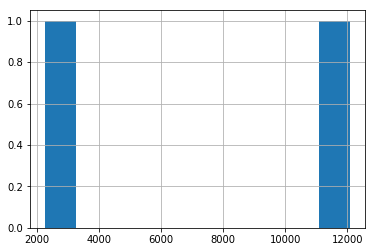

In [83]:
df.has_logo.value_counts().hist() 

0.842086908000279


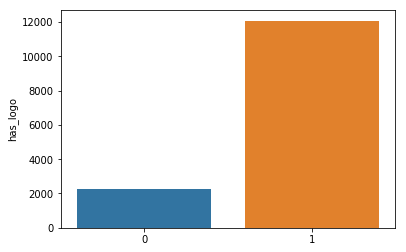

In [88]:
counts = df['has_logo'].value_counts()
sns.barplot(counts.index, counts);
print(df.has_logo.sum() / len(df.has_logo)) 

Okay, I will include the following features for further process based on intuation.

In [91]:
wanted = ['description', 'user_age', 'country', 
                  'ticket_types', 'venue_address', 'channels', 
                  'has_logo', 'delivery_method']

## Profit Analisis

Events that are fraud thereby makes the company lose money.

reminder = you will need t use your finding here to build your cost_benefit matrix.

In [92]:
df_fraud = df[df['target'] == 1]

In [99]:
df_fraud.shape[0]

1293

Non-Fraud events which may generate revenue or not depending on ticket sales.

In [93]:
df_valid = df[df['target'] == 0]

In [100]:
df_valid.shape[0]

13044

In [101]:
df_valid.head(1)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,target
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0


In [102]:
df_fraud.head(1)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,target
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1


### Cost 

In [125]:
df.ticket_types[0] # just to remind you and myself.

[{'availability': 1,
  'cost': 25.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 800},
 {'availability': 1,
  'cost': 50.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 100},
 {'availability': 1,
  'cost': 550.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 20}]

In [128]:
def cost_of_fraud(ticket_info_list):
    cost = 0
    for ticket_dict in ticket_info_list:
        cost += ticket_dict["cost"] * ticket_dict["quantity_sold"]
    return cost

df_fraud['cost_per_fraud'] = df['ticket_types'].map(cost_of_fraud)

In [140]:
#it hurts.
print(f'Total cost of all fraud events so far: ${round(df_fraud.cost_per_fraud.sum(),1)}')

Total cost of all fraud events so far: $597098.5


Avg cost of a fraud event is $461.8


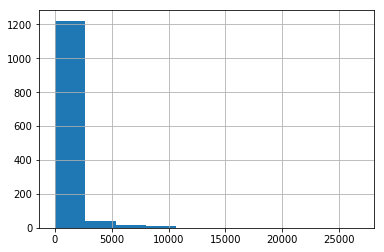

In [138]:
df_fraud.cost_per_fraud.hist()
avg_cost_per_fraud_all = df_fraud['cost_per_fraud'].mean()
print(f'Avg cost of a fraud event is ${round(avg_cost_per_fraud_all,1)}')

Now I am interested in fraud events that actually harm the company.

Harm in which manner? Well not all fraud events end up with fake ticket sales.

In [141]:
df_frauds_that_matter = df_fraud[df_fraud['cost_per_fraud'] > 0]

In [142]:
df_frauds_that_matter.head(2)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,target,cost_per_fraud
26,fraudster,1299607200,870,11,US,USD,0.0,"<h1 class=""post"">Welcome</h1>\r\n<p> </p>\r\n<...",hotmail.com,1299171416,...,1295576777,3,400 Fifth Avenue,US,40.750228,-73.983714,The Setai,NY,1,600.0
51,fraudster_event,1329465600,536,6,US,USD,0.0,"<p><span style=""font-size: x-large;"">Okay ever...",cox.net,1317544696,...,1310957994,1,404 euclid ave,US,32.702072,-117.085088,The Jacobs Center at Market Creek,CA,1,316.0


In [148]:
df_frauds_that_matter.shape[0] / df.shape[0]

0.022947618051196206

Interesting, historically only 2.2% of all events hurt the company by achieving ticket sales yet that the same 2.2% corresponds to almost $ 600k 

Avg cost of fraud events that matter $461.8


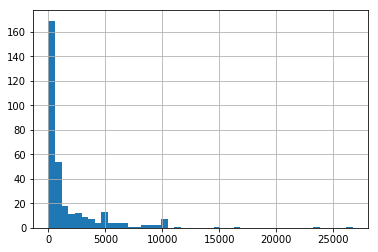

In [150]:
df_frauds_that_matter.cost_per_fraud.hist(bins = df_frauds_that_matter.shape[1])
avg_cost_per_fraud = df_frauds_that_matter['cost_per_fraud'].mean()
print(f'Avg cost of fraud events that matter ${round(avg_cost_per_fraud_all,1)}')

### Revenue

In [152]:
def revenue_of_valid(ticket_info_list):
    revenue = 0
    for ticket_dict in ticket_info_list:
        revenue += ticket_dict["cost"] * ticket_dict["quantity_sold"]
    return revenue

df_valid['revenue_of_valid'] = df['ticket_types'].map(revenue_of_valid)

In [153]:
avg_revenue_per_transaction = df_valid['revenue_of_valid'].sum() / df_valid.shape[0]
avg_revenue_per_transaction

2824.765238423801

Avg revenue fromm valid events: $2824.8


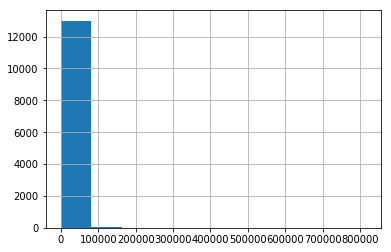

In [176]:
df_valid.revenue_of_valid.hist()
avg_revenue_per_valid_all = df_valid['revenue_of_valid'].mean()
print(f'Avg revenue fromm valid events: ${round(avg_revenue_per_valid_all,1)}')

#this graph just tells me that revenue generation is more balanced compared to cost of fraud,

I want to see distributions of different groups of revenue generation.
Dig in!

In [217]:
# df_valid['revenue_of_valid'].sort
# df_sorted = df.sort(['revenue_of_valid'], ascending=[1, 0])
df_valid_sorted = df_valid.sort_values(by='revenue_of_valid', ascending=0)['revenue_of_valid']
df_valid_sorted

df_100kplus = df_valid[df_valid['revenue_of_valid'] > 100000]
df_50kplus = df_valid[(df_valid['revenue_of_valid'] > 50000) & (df_valid['revenue_of_valid'] < 100000)]
df_20kplus = df_valid[(df_valid['revenue_of_valid'] > 20000) & (df_valid['revenue_of_valid'] < 50000)]
df_5kplus = df_valid[(df_valid['revenue_of_valid'] > 5000) & (df_valid['revenue_of_valid'] < 20000)]
df_1kplus = df_valid[(df_valid['revenue_of_valid'] > 1000) & (df_valid['revenue_of_valid'] < 5000)]
df_0plus = df_valid[(df_valid['revenue_of_valid'] > 0) & (df_valid['revenue_of_valid'] < 1000)]

df_no_800 = df_valid[(df_valid['revenue_of_valid'] >= 0) & (df_valid['revenue_of_valid'] < 500000)]
df_less_50 = df_valid[(df_valid['revenue_of_valid'] >= 0) & (df_valid['revenue_of_valid'] < 50000)]

38


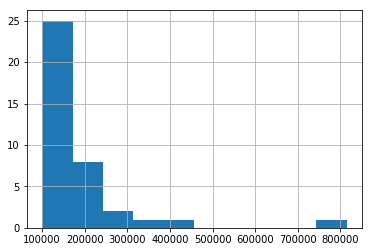

In [220]:
df_100kplus.revenue_of_valid.hist()
print(df_100kplus.shape[0])

62


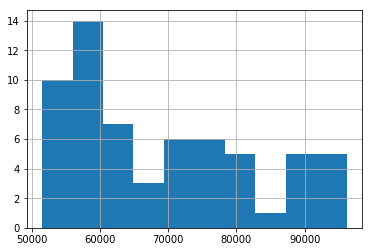

In [221]:
df_50kplus.revenue_of_valid.hist()
print(df_50kplus.shape[0])

240


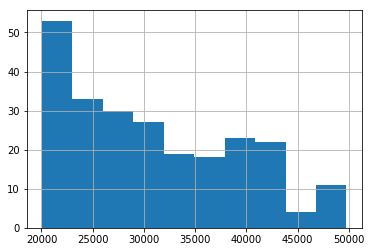

In [222]:
df_20kplus.revenue_of_valid.hist()
print(df_20kplus.shape[0])

963


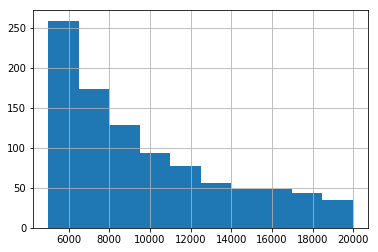

In [223]:
df_5kplus.revenue_of_valid.hist()
print(df_5kplus.shape[0])

2855


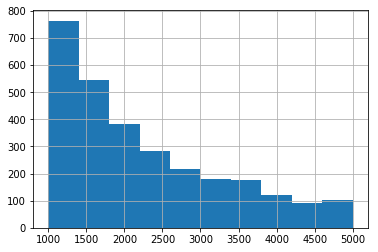

In [224]:
df_1kplus.revenue_of_valid.hist()
print(df_1kplus.shape[0])

8473


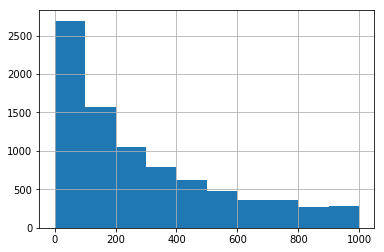

In [225]:
df_0plus.revenue_of_valid.hist()
print(df_0plus.shape[0])

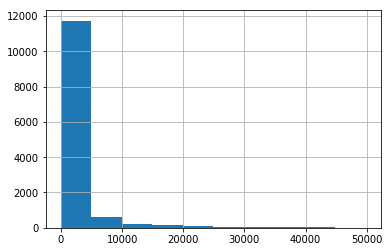

In [218]:
df_less_50.revenue_of_valid.hist()

Now lets have a look to the events that actually generate money!

In [171]:
df_valid_events_that_matter = df_valid[df_valid['revenue_of_valid'] > 0]

In [174]:
1 - (df_valid_events_that_matter.shape[0] / df_valid.shape[0])

0.02882551364612085

thoughts:? how about predicting events that do not generate money? I wonder if it is related to description. Have a look later eh mate?

**Findings**

- Total number of fraud events: 1293

- Avg Cost of all fraud events: $ 461

- Total number of fraud events that harm the company: 329 (2.2%)

- Avg. Cost of fraud events that harm the company: $ 1815

- Avg. Revenue per valid customer: 2885.

Okay, this is valuable information to generate a cost benefit matrix!